# Data Exploration for Amazon Review 2023

## Download

In [71]:
import requests
import os
from tqdm import tqdm


def download_file(url, category):
    """
    Download a file for specific categories.

    Parameters:
    - url (str): URL of the file to be downloaded.
    - category (str): Category folder where the files will be saved ("cd_and_vinyl" or "office_products").
    """
    # Define output folder
    output_folder = os.path.join("../data", category)
    os.makedirs(output_folder, exist_ok=True)

    # File path
    file_path = os.path.join(output_folder, os.path.basename(url))

    # Check if file already exists
    if os.path.exists(file_path):
        print(f"{file_path} already exists. Skipping download.")
        return file_path

    # Download file with tqdm progress bar
    print(f"Downloading {url} to {file_path}...")
    response = requests.get(url, stream=True)
    if response.status_code != 200:
        print(f"Failed to download {url}. Status code: {response.status_code}")
        return None
    total_size = int(response.headers.get("content-length", 0))

    with open(file_path, "wb") as f:
        with tqdm(
            total=total_size, unit="B", unit_scale=True, desc=os.path.basename(url)
        ) as pbar:
            for data in response.iter_content(1024):
                f.write(data)
                pbar.update(len(data))

    print(f"Downloaded: {file_path}")
    return file_path

# URLs and categories
categories = {
    "cd_and_vinyl": [
        "https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/review_categories/CDs_and_Vinyl.jsonl",
        "https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/meta_categories/meta_CDs_and_Vinyl.jsonl",
    ],
    "office_products": [
        "https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/review_categories/Office_Products.jsonl",
        "https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/meta_categories/meta_Office_Products.jsonl",
    ],
}

# Download files for each category
for category, urls in categories.items():
    for url in urls:
        download_file(url, category)

../data\cd_and_vinyl\CDs_and_Vinyl.jsonl already exists. Skipping download.
../data\cd_and_vinyl\meta_CDs_and_Vinyl.jsonl already exists. Skipping download.
../data\office_products\Office_Products.jsonl already exists. Skipping download.
../data\office_products\meta_Office_Products.jsonl already exists. Skipping download.


## Libs

In [72]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Load data

In [73]:
def load_jsonl(file_path, num_rows=None):
    """
    Load a JSONL file into a pandas DataFrame.

    Parameters:
    - file_path (str): Path to the JSONL file.
    - num_rows (int): Number of rows to load (for testing purposes).

    Returns:
    - DataFrame containing the JSONL data.
    """
    data = []
    with open(file_path, "r") as file:
        for i, line in enumerate(file):
            if num_rows and i >= num_rows:
                break
            data.append(json.loads(line.strip()))
    return pd.DataFrame(data)

## Cd and Vinyl

In [74]:
# File paths
review_file_path = (
    "../data/cd_and_vinyl/CDs_and_Vinyl.jsonl"  # Example path for reviews
)
meta_file_path = (
    "../data/cd_and_vinyl/meta_CDs_and_Vinyl.jsonl"  # Example path for metadata
)

# Load data
reviews_df = load_jsonl(
    review_file_path, num_rows=10000
)  # Load 10k reviews for an initial analysis
meta_df = load_jsonl(meta_file_path)

# Show samples
print("Sample Reviews:")
display(reviews_df.head())

print("\nSample Metadata:")
display(meta_df.head())

Sample Reviews:


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Five Stars,LOVE IT!,[],B002MW50JA,B002MW50JA,AGKASBHYZPGTEPO6LWZPVJWB2BVA,1452650777000,0,True
1,5.0,Five Stars,LOVE!!,[],B008XNPN0S,B008XNPN0S,AGKASBHYZPGTEPO6LWZPVJWB2BVA,1452650764000,0,True
2,3.0,Three Stars,Sad there is not the versions with the real/or...,[],B00IKM5N02,B00IKM5N02,AGKASBHYZPGTEPO6LWZPVJWB2BVA,1452649885000,0,True
3,3.0,Disappointed,I have listen to The Broadway 1958 Flower Drum...,[],B00006JKCM,B00006JKCM,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,1164036864000,3,True
4,5.0,Wonderful melding,Simply great album. One of the best. Marvelous...,[],B00013YRQY,B00013YRQY,AFWHJ6O3PV4JC7PVOJH6CPULO2KQ,1582090199946,0,False



Sample Metadata:


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Digital Music,Release Some Tension,4.6,112,[],[Swv ~ Release Some Tension],12.05,[{'thumb': 'https://m.media-amazon.com/images/...,[],SWV Format: Audio CD,"[CDs & Vinyl, Dance & Electronic, House]","{'Is Discontinued By Manufacturer': 'No', 'Pro...",B000002X4C,None,NaN,NaN
1,Digital Music,Rio Angie,5.0,1,[],"[Shrimp City Slim (aka Gary Erwin, b. 1953, Ch...",14.98,[{'thumb': 'https://m.media-amazon.com/images/...,[],Shrimp City Slim (Artist) Format: Audio CD,"[CDs & Vinyl, Jazz, Avant Garde & Free Jazz]",{'Product Dimensions': '5.6 x 0.4 x 4.9 inches...,B00902T10Y,None,NaN,NaN
2,Digital Music,Lost in Love,5.0,9,[],[],24.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Nastyboy Klick Format: Audio CD,"[CDs & Vinyl, Rap & Hip-Hop, Gangsta & Hardcore]",{'Package Dimensions': '4.7 x 4.6 x 0.1 inches...,B00000DALY,None,NaN,NaN
3,Digital Music,Somewhere in Time,4.8,1186,[],[The 1980 soundtrack to the now classic motion...,11.55,[{'thumb': 'https://m.media-amazon.com/images/...,[],"John Barry (Composer), Barry, John (Comp...","[CDs & Vinyl, Soundtracks, Movie Scores]","{'Is Discontinued By Manufacturer': 'No', 'Lan...",B0000086D1,None,NaN,NaN
4,Digital Music,Kimmon Waldruff,5.0,1,[],[Solo acoustic fingerstyle guitar.],14.07,[{'thumb': 'https://m.media-amazon.com/images/...,[],Kimmon Waldruff (Artist) Format: Audio CD,"[CDs & Vinyl, Folk]","{'Is Discontinued By Manufacturer': 'No', 'Pro...",B000S6W7KC,None,NaN,NaN


### Statistical Summary

In [75]:
# # Descriptive statistics
# print("Review Statistics:")
# display(reviews_df.describe())

# print("\nProduct Metadata Statistics:")
# display(meta_df.describe())

### Rating distribution

C:\Users\mathe\AppData\Local\Temp\ipykernel_12840\1178620044.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=reviews_df, palette=color_dict)


ValueError: The palette dictionary is missing keys: {'3.0', '1.0', '2.0', '5.0', '4.0'}

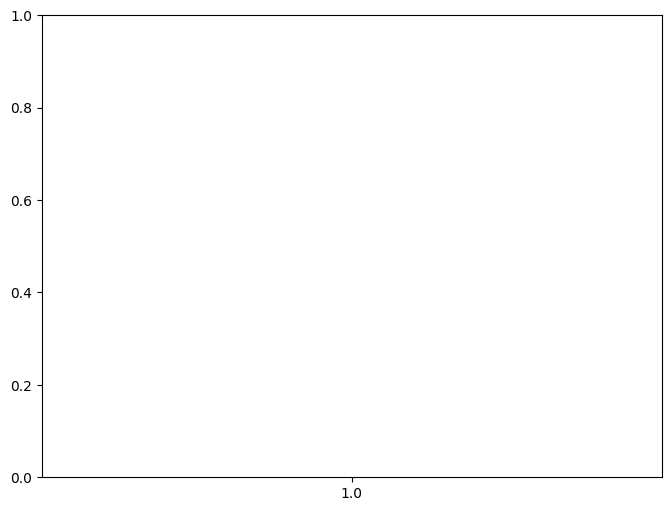

In [76]:
# Define a custom color palette for each rating
unique_ratings = sorted(reviews_df['rating'].dropna().unique())
palette = sns.color_palette('viridis', n_colors=len(unique_ratings))
color_dict = dict(zip(unique_ratings, palette))

plt.figure(figsize=(8, 6))
sns.countplot(x="rating", data=reviews_df, palette=color_dict)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Review Distribution Over Time

Can't analyse by time because we have missing timestamps.

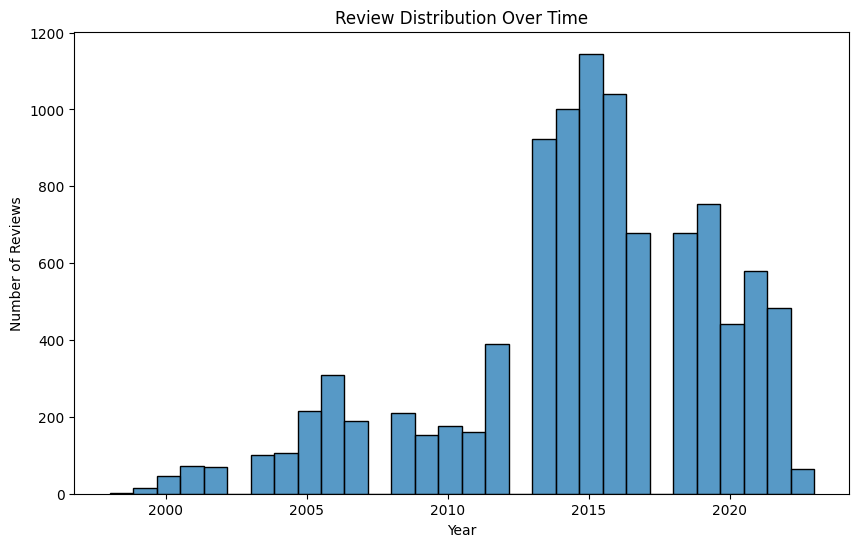

In [ ]:
# Convert milliseconds to seconds
reviews_df["timestamp"] = (
    reviews_df["timestamp"] // 1000
)  # Integer division to avoid float values

# Convert to datetime and plot
reviews_df["_timestamp"] = pd.to_datetime(
    reviews_df["timestamp"], unit="s", errors="coerce"
)

# Drop rows with invalid timestamps
valid_reviews_df = reviews_df.dropna(subset=["_timestamp"])

# Extract year
valid_reviews_df["year"] = valid_reviews_df["_timestamp"].dt.year

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=valid_reviews_df, x="year", bins=30, kde=False)
plt.title("Review Distribution Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()

### Price vs Average Product Rating

In [ ]:
reviews_df

,reviewerID,product_id,reviewerName,verified,review_text,rating,review_time,summary,timestamp,vote,style,image
0,A171I27YBM4FL6,0001393774,Eline Mann,True,I love this CD. So inspiring!,5.0,"04 29, 2016",Five Stars,2016-04-29,NaN,NaN,NaN
1,A1H1DL4K669VQ9,0001393774,Judith Paladino,True,Love it!! Great seller!,5.0,"04 29, 2016",Five Stars,2016-04-29,NaN,NaN,NaN
2,A23WIHT5886G36,0001393774,Mark Leszczynski,True,I bought this on cassette tape in the 80's. So...,5.0,"04 19, 2016",I bought this on cassette tape in the 80's. ...,2016-04-19,NaN,NaN,NaN
3,A3SZNOJP8OL26X,0001393774,mimi,True,as good as i remember back when i bought the o...,5.0,"03 30, 2016",Five Stars,2016-03-30,NaN,NaN,NaN
4,A3V5XBBT7OZG5G,0001393774,gflady,True,One of my very favourite albums from one of my...,5.0,"02 23, 2016",One of my very favourite albums from one of my...,2016-02-23,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,A1J5U8UXMJJ9JT,6303477259,E. Wilkinson,False,"I was at this concert, and if I close my eyes ...",4.0,"03 13, 2007","Love the music, but the video is lack luster a...",2007-03-13,NaN,{'Format:': ' DVD'},NaN
9996,A33AGBVEJV0KJH,6303477259,Stephen Alholm,False,"As an avid Pink Floyd fan, I was speechless th...",5.0,"03 9, 2007","Perhaps the most exciting, best produced live ...",2007-03-09,2,{'Format:': ' DVD'},NaN
9997,AYC4CEJC9G8QU,6303477259,SeanMusic,False,Pink Floyd at its best!!! 5.1 sound is phenome...,5.0,"03 8, 2007",The Concert you wish you were at !!!,2007-03-08,2,{'Format:': ' DVD'},NaN
9998,A32K7TR3K1I9YH,6303477259,vtfirefighter32,True,"I love this DVD, can't get enough of Pink Floyd.",5.0,"03 8, 2007",Can't get enough of Pink Floyd,2007-03-08,NaN,{'Format:': ' DVD'},NaN


In [ ]:
# transform index in id meta_df
meta_df['id'] = meta_df.index

# order by id
meta_df = meta_df.sort_values(by='id')

meta_df.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,id
5,"[CDs & Vinyl, Holiday & Wedding]",,"[This is a concept album all the way, with tal...",,Christmas Eve and Other Stories,"[B01M0L3X65, B07G1V9Q3X, B00000AEDW, B0002ZDVG...",,Trans-Siberian Orchestra,[],73 in CDs & Vinyl (,"[B01M0L3X65, B07G1V9Q3X, B0002ZDVGS, B00000AED...","<img src=""https://images-na.ssl-images-amazon....",,,5.98,0005164885,[],[],NaN,5
7,"[CDs & Vinyl, Christian, Children's]",,[],,Bless My Little Boy,[],,Various,[],"2,010,523 in CDs & Vinyl (",[],"<img src=""https://images-na.ssl-images-amazon....",,,10.98,0005441374,[],[],NaN,7
10,"[CDs & Vinyl, Christian, Children's]",,[1. I Am A C-H-R-I-S-T-I-A-N 2. Standin' In Th...,,Sunday School Songs,"[B00077837I, B000008UPI, B00000DPLJ, B000008U73]",,Cedarmont Kids,[],"119,517 in CDs & Vinyl (","[B00778F2QA, B000008UPG, B00429UEV0, B000008UP...","<img src=""https://images-na.ssl-images-amazon....",,,3.99,0005072336,[],[],NaN,10
11,"[CDs & Vinyl, Special Interest]",,"[Joe Hill, ''the best horror writer of our gen...",,Dark Carousel Edition,"[B07DQ9JKM5, B07CPJYRBT, B07FDQRKCR, B07GRVC36...",,Joe Hill (Author),[],"58,077 in CDs & Vinyl (","[1587676796, 1982102314, 0062663119, 163140768...","<img src=""https://images-na.ssl-images-amazon....",,,32.98,0062856499,[],[],NaN,11
12,"[CDs & Vinyl, Jazz]",,[],,Unreleased Art: Volume 9,"[B07JJ5WH9H, B00GFYUXVG, B07GW2SZPY, B01N2NTGV...",,Art Pepper,[],"88,886 in CDs & Vinyl (","[B000RLZ548, B005BY8XA4, B07JJ5WH9H, B00GFYUXV...","<img src=""https://images-na.ssl-images-amazon....",,,28.41,0240174372,[],[],NaN,12


In [ ]:
reviews_df

,reviewerID,product_id,reviewerName,verified,review_text,rating,review_time,summary,timestamp,vote,style,image
0,A171I27YBM4FL6,0001393774,Eline Mann,True,I love this CD. So inspiring!,5.0,"04 29, 2016",Five Stars,2016-04-29,NaN,NaN,NaN
1,A1H1DL4K669VQ9,0001393774,Judith Paladino,True,Love it!! Great seller!,5.0,"04 29, 2016",Five Stars,2016-04-29,NaN,NaN,NaN
2,A23WIHT5886G36,0001393774,Mark Leszczynski,True,I bought this on cassette tape in the 80's. So...,5.0,"04 19, 2016",I bought this on cassette tape in the 80's. ...,2016-04-19,NaN,NaN,NaN
3,A3SZNOJP8OL26X,0001393774,mimi,True,as good as i remember back when i bought the o...,5.0,"03 30, 2016",Five Stars,2016-03-30,NaN,NaN,NaN
4,A3V5XBBT7OZG5G,0001393774,gflady,True,One of my very favourite albums from one of my...,5.0,"02 23, 2016",One of my very favourite albums from one of my...,2016-02-23,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,A1J5U8UXMJJ9JT,6303477259,E. Wilkinson,False,"I was at this concert, and if I close my eyes ...",4.0,"03 13, 2007","Love the music, but the video is lack luster a...",2007-03-13,NaN,{'Format:': ' DVD'},NaN
9996,A33AGBVEJV0KJH,6303477259,Stephen Alholm,False,"As an avid Pink Floyd fan, I was speechless th...",5.0,"03 9, 2007","Perhaps the most exciting, best produced live ...",2007-03-09,2,{'Format:': ' DVD'},NaN
9997,AYC4CEJC9G8QU,6303477259,SeanMusic,False,Pink Floyd at its best!!! 5.1 sound is phenome...,5.0,"03 8, 2007",The Concert you wish you were at !!!,2007-03-08,2,{'Format:': ' DVD'},NaN
9998,A32K7TR3K1I9YH,6303477259,vtfirefighter32,True,"I love this DVD, can't get enough of Pink Floyd.",5.0,"03 8, 2007",Can't get enough of Pink Floyd,2007-03-08,NaN,{'Format:': ' DVD'},NaN


In [ ]:
meta_df

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,id
5,"[CDs & Vinyl, Holiday & Wedding]",,"[This is a concept album all the way, with tal...",,Christmas Eve and Other Stories,"[B01M0L3X65, B07G1V9Q3X, B00000AEDW, B0002ZDVG...",,Trans-Siberian Orchestra,[],73 in CDs & Vinyl (,"[B01M0L3X65, B07G1V9Q3X, B0002ZDVGS, B00000AED...","<img src=""https://images-na.ssl-images-amazon....",,,5.98,0005164885,[],[],NaN,5
7,"[CDs & Vinyl, Christian, Children's]",,[],,Bless My Little Boy,[],,Various,[],"2,010,523 in CDs & Vinyl (",[],"<img src=""https://images-na.ssl-images-amazon....",,,10.98,0005441374,[],[],NaN,7
10,"[CDs & Vinyl, Christian, Children's]",,[1. I Am A C-H-R-I-S-T-I-A-N 2. Standin' In Th...,,Sunday School Songs,"[B00077837I, B000008UPI, B00000DPLJ, B000008U73]",,Cedarmont Kids,[],"119,517 in CDs & Vinyl (","[B00778F2QA, B000008UPG, B00429UEV0, B000008UP...","<img src=""https://images-na.ssl-images-amazon....",,,3.99,0005072336,[],[],NaN,10
11,"[CDs & Vinyl, Special Interest]",,"[Joe Hill, ''the best horror writer of our gen...",,Dark Carousel Edition,"[B07DQ9JKM5, B07CPJYRBT, B07FDQRKCR, B07GRVC36...",,Joe Hill (Author),[],"58,077 in CDs & Vinyl (","[1587676796, 1982102314, 0062663119, 163140768...","<img src=""https://images-na.ssl-images-amazon....",,,32.98,0062856499,[],[],NaN,11
12,"[CDs & Vinyl, Jazz]",,[],,Unreleased Art: Volume 9,"[B07JJ5WH9H, B00GFYUXVG, B07GW2SZPY, B01N2NTGV...",,Art Pepper,[],"88,886 in CDs & Vinyl (","[B000RLZ548, B005BY8XA4, B07JJ5WH9H, B00GFYUXV...","<img src=""https://images-na.ssl-images-amazon....",,,28.41,0240174372,[],[],NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516909,"[CDs & Vinyl, Pop]",,[],,Furnaces,"[B07CBLRXNP, B01MYB68L4, B07BZBD1TY, B01MY7Z66...",,Ed Harcourt,[],"251,328 in CDs & Vinyl (","[B07JBYSQ63, B00B8ZOZ84, B0048IDRJQ, B00HVKMYY...","<img src=""https://images-na.ssl-images-amazon....",,,9.79,B01HJ7FPAG,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Audio CD': '(August 26, 2016)', 'Number of D...",516909
516910,"[CDs & Vinyl, Country]",,[CHARLIE DANIELS - NIGHTHAWK - CD],,Night Hawk,"[0718074963, B0012GMV5S, B00I89Y2SQ, B07H5VY3L...",,Charlie Daniels Band,[],"68,288 in CDs & Vinyl (","[B07H5VY3LK, B00FLV06V6, B00I89Y2SQ, B01JU6OYK...","<img src=""https://images-na.ssl-images-amazon....",,,8.00,B01HJDG28E,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Audio CD': '(August 26, 2016)', 'Original Re...",516910
516911,"[CDs & Vinyl, Pop, Vocal Pop]",,[Five CD set containing a quintet of albums by...,,Original Album Classics,"[B00A7F17Z0, B00975L6O8, B00NMUCLBQ, B000002VE...",,Dionne Warwick,[],"69,386 in CDs & Vinyl (","[B00A7F17Z0, B0000032WJ, B00000IFVX, B00004SW9...","<img src=""https://images-na.ssl-images-amazon....",,,14.56,B01HJG3UQI,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Audio CD': '(September 9, 2016)', 'Original ...",516911
516912,"[CDs & Vinyl, Pop]",,[2016 five CD set containing a quintet of orig...,,Original Album Classics,"[B06Y1L22WT, B017CJL0BO, B005JS7VTQ, B01FJ2UKD...",,The Guess Who,[],"1,795 in CDs & Vinyl (","[B000CNE11O, B00000I0QI, B0042OZDP2, B0015XAT4...","<img src=""https://images-na.ssl-images-amazon....",,,17.28,B01HJG3VZI,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Audio CD': '(September 9, 2016)', 'Original ...",516912


### Top 5 most reviewed products

In [ ]:
# Sort by the number of ratings and display the top 5 products
top_reviewed_products = meta_df.sort_values(by="rating_number", ascending=False).head(5)

# Display the top 5 products with relevant information
print("Top 5 Most Reviewed Products:")
display(top_reviewed_products[["title", "rating_number", "average_rating", "price"]])

Top 5 Most Reviewed Products:


,title,rating_number,average_rating,price
319882,Soundtrack,2435,4.8,18.99
576593,Keeper of the Seven Keys - Part 1,1117,4.8,199.95
130863,I Knew You When,644,4.6,7.30
132809,A Hard Day's Night [Original Motion Picture So...,482,4.8,45.00
352504,Quelqu'un M'a Dit,391,4.6,11.90


## Office Products

In [ ]:
# File paths
review_file_path = (
    "../data/office_products/Office_Products.jsonl"  # Example path for reviews
)
meta_file_path = (
    "../data/office_products/meta_Office_Products.jsonl"  # Example path for metadata
)

# Load data
reviews_df = load_jsonl(
    review_file_path, num_rows=10000
)  # Load 10k reviews for an initial analysis
meta_df = load_jsonl(meta_file_path)

# Show samples
print("Sample Reviews:")
display(reviews_df.head())

print("\nSample Metadata:")
display(meta_df.head())

Sample Reviews:


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Pretty & I love it!,Lovely ink. Writes well. The right amount of w...,[],B01AHHL4X2,B01MZ3SD2X,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1677939345945,0,True
1,4.0,2 excellent 1 extremely dry (blue),Overall I’m pretty happy with this purchase bc...,[],B08L6H23JZ,B08L6H23JZ,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1677939160682,0,True
2,1.0,I don’t get the reviews. Mine are garbage.,[[VIDEOID:63276c19932aa4f3687042b8b9f8613c]] U...,[],B07JDZ5J46,B07JDZ5J46,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1660188831933,2,True
3,4.0,Ordering Ink online: never a good idea I guess.,"It’s a beautiful color, but even though it had...",[{'small_image_url': 'https://m.media-amazon.c...,B004MNX7EW,B07BR2PBJN,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1659806066713,0,True
4,3.0,Mine are iffy at best.,Idk if I just got a bad batch which is possibl...,[],B019YLRFFS,B097SFY5ZS,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1659799390978,0,True



Sample Metadata:


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Office Products,Alliance Rubber 07706 Non-Latex Brites File Ba...,4.5,665,[REUSABLE: These colored rubber bands are stre...,[Alliance Rubber Brites File Bands are durable...,2.68,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'AMUU rubber bands Large 50 Pack 5 ...,Alliance,"[Office Products, Office & School Supplies, Ta...",{'Manufacturer': 'Alliance Rubber Company Inc....,B001S28Q4Q,None,NaN,NaN
1,Office Products,"10 Set Mini Office Stapler with 10# Staples, S...",3.3,186,[Made of high quality metal & plastic for dura...,"[Whether you're a teacher, office worker or st...",13.99,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Small Mini stapler ', 'url': 'http...",Chneeu,"[Office Products, Office & School Supplies, St...","{'Manufacturer': 'Chnee', 'Brand': 'Chneeu', '...",B07RPQVH21,None,NaN,NaN
2,Office Products,Creanoso Humorous Sayings Bookish Bookmarks fo...,4.6,100,[Creanoso Bookish Humor and Sayings Bookmarks ...,[],9.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Cool Space Starry Night Bookmarks'...,Creanoso,"[Office Products, Office & School Supplies, Bo...","{'Manufacturer': 'Creanoso', 'Brand': 'Creanos...",B07J58B87Q,None,NaN,NaN
3,All Electronics,PenPower WorldPen Scan Go | OCR Reading Pen wi...,3.9,296,[TEXT TO SPEECH - Scan printed or digital text...,[],149.0,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Easy to use', 'url': 'https://www....",PenPower,"[Office Products, Office Electronics, Scanners...","{'Product Dimensions': '0.56""D x 1.24""W x 5.77...",B098NQ685V,None,NaN,NaN
4,Amazon Home,"Assorted Best Selling Birthday Cards, Set of 8...",4.0,11,[],[],None,[{'thumb': 'https://m.media-amazon.com/images/...,[],Apartment 2 Cards,"[Office Products, Office & School Supplies, Pa...",{'Product Dimensions': '5.5 x 4.25 x 0.13 inch...,B00DBSNIC0,None,NaN,NaN


### Statistical Summary

In [ ]:
# Descriptive statistics
print("Review Statistics:")
display(reviews_df.describe())

print("\nProduct Metadata Statistics:")
display(meta_df.describe())

Review Statistics:


,rating,timestamp,helpful_vote
count,10000.000000,1.000000e+04,10000.000000
mean,4.438100,1.555365e+12,1.241800
std,1.077165,9.182938e+10,12.541884
min,1.000000,1.033911e+12,0.000000
25%,4.000000,1.500573e+12,0.000000
50%,5.000000,1.577502e+12,0.000000
75%,5.000000,1.623204e+12,0.000000
max,5.000000,1.678996e+12,710.000000



Product Metadata Statistics:


,average_rating,rating_number
count,710503.000000,710503.000000
mean,4.227688,145.412915
std,0.793734,1124.401971
min,1.000000,1.000000
25%,4.000000,3.000000
50%,4.400000,13.000000
75%,4.800000,55.000000
max,5.000000,216285.000000


### Rating distribution

C:\Users\mathe\AppData\Local\Temp\ipykernel_12840\748774560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=reviews_df, palette="viridis")


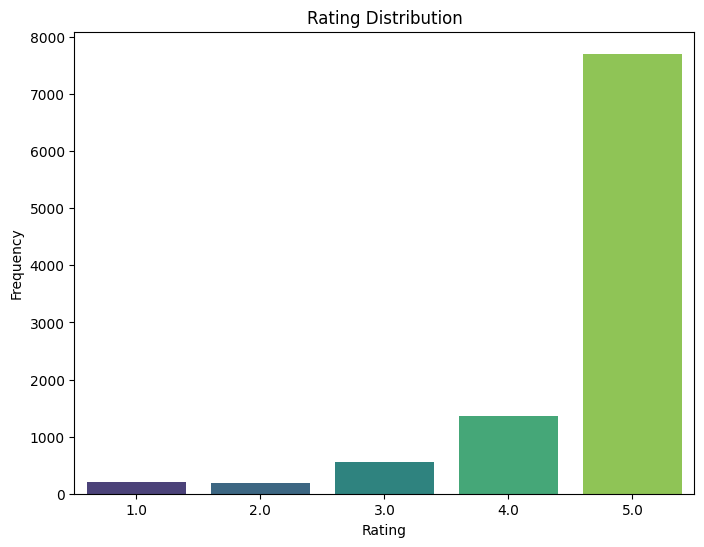

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="rating", data=reviews_df, palette="viridis")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Review Distribution Over Time

Can't analyse by time because we have missing timestamps.

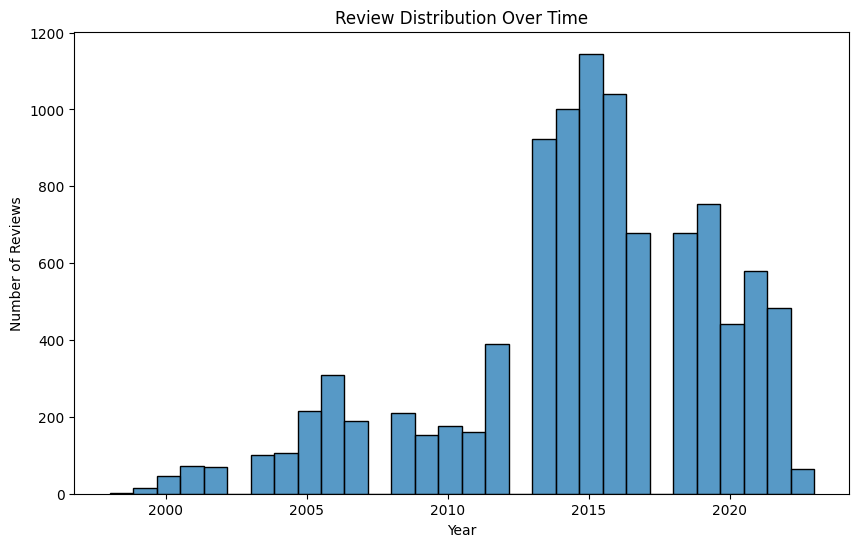

In [77]:
# Convert milliseconds to seconds
reviews_df["timestamp"] = (
    reviews_df["timestamp"] // 1000
)  # Integer division to avoid float values

# Convert to datetime and plot
reviews_df["_timestamp"] = pd.to_datetime(
    reviews_df["timestamp"], unit="s", errors="coerce"
)

# Drop rows with invalid timestamps
valid_reviews_df = reviews_df.dropna(subset=["_timestamp"])

# Extract year
valid_reviews_df["year"] = valid_reviews_df["_timestamp"].dt.year

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=valid_reviews_df, x="year", bins=30, kde=False)
plt.title("Review Distribution Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()

### Price vs Average Product Rating

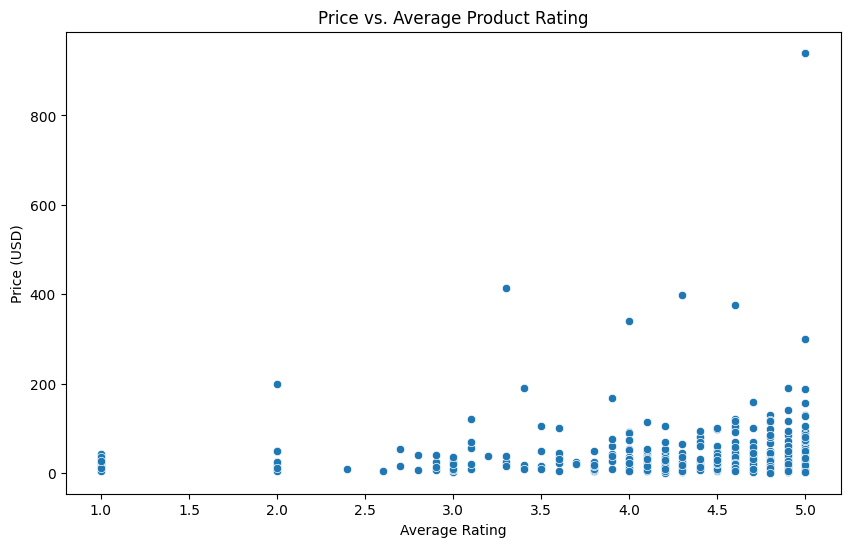

In [ ]:
# Convert price to numeric, coerce errors to NaN (non-numeric entries)
meta_df["price"] = pd.to_numeric(
    meta_df["price"].str.replace(r"[^\d.]", "", regex=True), errors="coerce"
)

# Drop rows where price is NaN (invalid price values)
meta_df = meta_df.dropna(subset=["price"])

# Plot Price vs Average Product Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x="average_rating", y="price", data=meta_df)
plt.title("Price vs. Average Product Rating")
plt.xlabel("Average Rating")
plt.ylabel("Price (USD)")
plt.show()

### Top 5 most reviewed products

In [47]:
# Sort by the number of ratings and display the top 5 products
top_reviewed_products = meta_df.sort_values(by="rating_number", ascending=False).head(5)

# Display the top 5 products with relevant information
print("Top 5 Most Reviewed Products:")
top_reviewed_products[["title", "rating_number", "average_rating", "price"]].style

Top 5 Most Reviewed Products:


,title,rating_number,average_rating,price
242815,"Christian Art Gifts Journal w/Scripture Grace Upon Grace John 1:16 Bible Verse Pink Floral Inspirational Wire Bound Spiral w/ 192 Lined Pages,",11838,4.800000,16.950000
33563,"Christian Art Gifts Journal w/Scripture I Can Do All This Through Him Philippians 4:13 Bible Verse Purple Floral 192 Ruled Pages, Large Hardcover Notebook, Wire Bound",11768,4.800000,11.000000
519174,"Christian Art Gifts Journal w/Scripture Desire Of Your Heart Psalm 20:4 Bible Verse Blue Floral 192 Ruled Pages, Large Hardcover Notebook, Wire Bound",7635,4.800000,21.020000
478771,"Christian Art Gifts Journal w/Scripture Serenity Prayer Pink Roses 192 Ruled Pages, Large Hardcover Notebook, Wire Bound",7625,4.800000,8.000000
600808,"Christian Art Gifts Classic Handy-sized Journal Names of Jesus Inspirational Scripture Notebook w/Ribbon, Faux Leather Flexcover 240 Ruled Pages, 5.7"" x 7"", Burgundy",3370,4.800000,20.120000
